### Import necessary libararies.

In [6]:
from os import walk,path
import tensorflow as tf
print(tf.__version__)

2.11.0


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [8]:
img=image.load_img("D:\\Computer_Vision\\base_data\\training\\Wallcracks\\download (3).jpg")

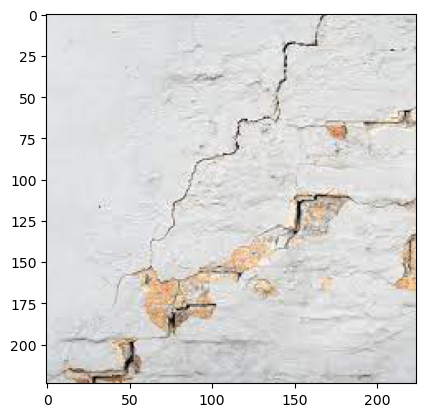

In [9]:
plt.imshow(img)

OpenCV-Python is a library of Python bindings designed to solve computer vision problems. cv2. imshow() method is used to display an image in a window. The window automatically fits the image size.

OpenCV-Python is a library of Python bindings designed to solve computer vision problems. cv2. imread() method loads an image from the specified file. If the image cannot be read (because of missing file, improper permissions, unsupported or invalid format) then this method returns an empty matrix.

In [10]:
cv2.imread('D:\\Computer_Vision\\base_data\\training\\Wallcracks\\download (3).jpg').shape

(224, 224, 3)

In [11]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [13]:
train_dataset=train.flow_from_directory('D:\\Computer_Vision\\base_data\\training',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')
validation_dataset=validation.flow_from_directory('D:\\Computer_Vision\\base_data\\testing',
                                       target_size=(200,200),
                                       batch_size=3,
                                       class_mode='binary')

Found 147 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [14]:
train_dataset.class_indices

{'Crackfreewalls': 0, 'Wallcracks': 1}

In [15]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
from keras import layers
from keras import models

In [17]:
input_shape=(200,200,3)
batch_size=256
kernel_size=3 #it is a matrix ,3 means 3 *3 matrix.
pool_size=2#Size of the maxpool.
filters=64#number

In [18]:
model=models.Sequential()
model.add(layers.Conv2D(filters=filters,kernel_size=kernel_size,activation='relu',input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size))
model.add(layers.Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(layers.MaxPooling2D(pool_size))
model.add(layers.Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 135424)            0

In [20]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [21]:
model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=50,validation_data=validation_dataset)

Epoch 1/50
3/3 [==============================] - 4s 1s/step - loss: 9.6653 - accuracy: 0.4444 - val_loss: 2.2034 - val_accuracy: 0.5000
Epoch 2/50
3/3 [==============================] - 2s 1s/step - loss: 3.1786 - accuracy: 0.4444 - val_loss: 0.7169 - val_accuracy: 0.5000
Epoch 3/50
3/3 [==============================] - 2s 1s/step - loss: 0.8884 - accuracy: 0.3333 - val_loss: 0.6957 - val_accuracy: 0.5000
Epoch 4/50
3/3 [==============================] - 2s 1s/step - loss: 0.7341 - accuracy: 0.3333 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 5/50
1/3 [=========>....................] - ETA: 0s - loss: 0.7836 - accuracy: 0.0000e+00

C:\Users\LENOVO\anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3/3 [==============================] - 2s 1s/step - loss: 0.7677 - accuracy: 0.2222 - val_loss: 0.6839 - val_accuracy: 0.7500
Epoch 6/50
3/3 [==============================] - 2s 1s/step - loss: 0.6621 - accuracy: 0.6667 - val_loss: 0.7275 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 2s 1s/step - loss: 0.8100 - accuracy: 0.5556 - val_loss: 0.6965 - val_accuracy: 0.4500
Epoch 8/50
3/3 [==============================] - 2s 1s/step - loss: 0.5732 - accuracy: 0.7778 - val_loss: 0.9168 - val_accuracy: 0.5000
Epoch 9/50
3/3 [==============================] - 2s 1s/step - loss: 0.7531 - accuracy: 0.6667 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 10/50
3/3 [==============================] - 2s 1s/step - loss: 0.8125 - accuracy: 0.3333 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 11/50
3/3 [==============================] - 2s 1s/step - loss: 0.7028 - accuracy: 0.3333 - val_loss: 0.6807 - val_accuracy: 0.5250
Epoch 12/50
3/3 [==============================] -

In [22]:
for dir_path,dir_name,file_name in walk("D:/Computer_Vision/base_data/testing"):
    print(dir_path)#here access all the folders's path inside the file
    print(dir_name)#dir_name means folder name
    print(file_name)

D:/Computer_Vision/base_data/testing
['Crackfreewalls', 'Wallcracks']
[]
D:/Computer_Vision/base_data/testing\Crackfreewalls
[]
['01-interior-walls_1709458624.jpg', '03-interior-walls_99929006.jpg', '360_F_286310318_bDU97THLUfymtv71EdDZ4ddItRwmFUph.jpg', 'art-gallery-empty-room-with-white-walls-lamps_107791-1490.webp', 'dark-blue-living-room-interior-260nw-2101162186.webp', 'depositphotos_120936026-stock-photo-interior-with-blank-wall.jpg', 'download (1).jpg', 'download (15).jpg', 'download (16).jpg', 'download (17).jpg', 'download (18).jpg', 'download (19).jpg', 'download (2).jpg', 'download (20).jpg', 'download (21).jpg', 'download (22).jpg', 'download (23).jpg', 'download (24).jpg', 'download (25).jpg', 'download (3).jpg', 'download (4).jpg', 'download.jpg', 'empty-office-white-wall-front-260nw-393134362.webp', 'gray-blank-concrete-wall-mockup-with-wooden-floor_53876-102393.webp', 'idea-white-empty-scandinavian-room-260nw-1017135367.webp']
D:/Computer_Vision/base_data/testing\Wallcr

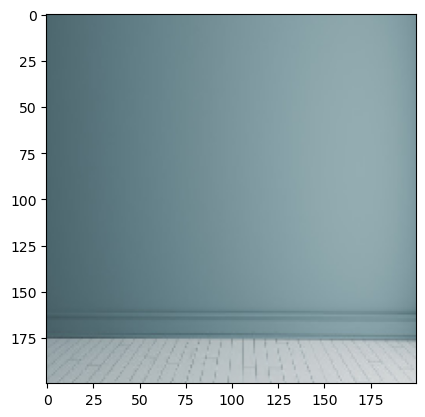

1/1 [==============================] - 0s 142ms/step
Crackfree Walls


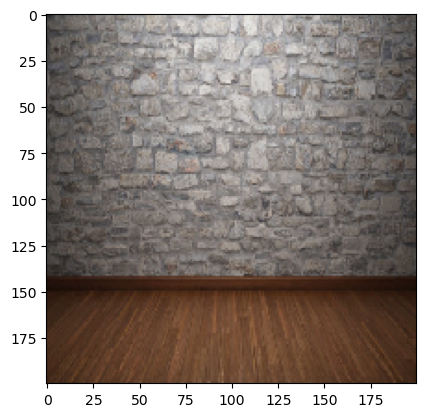

1/1 [==============================] - 0s 46ms/step
Cracked Walls


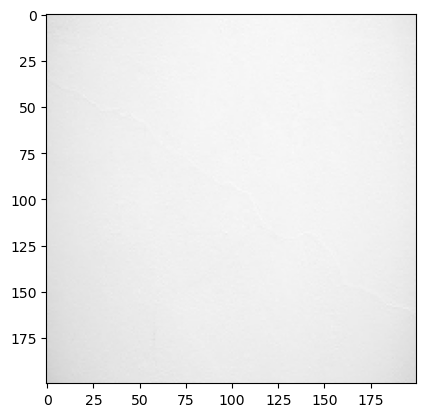

1/1 [==============================] - 0s 64ms/step
Crackfree Walls


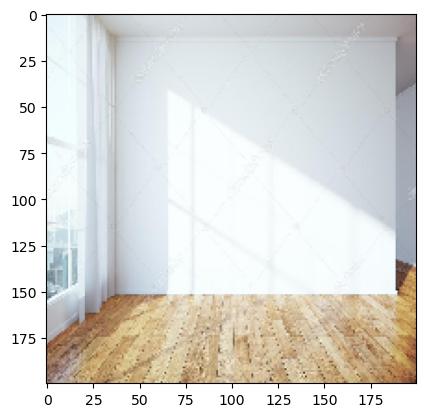

1/1 [==============================] - 0s 53ms/step
Crackfree Walls


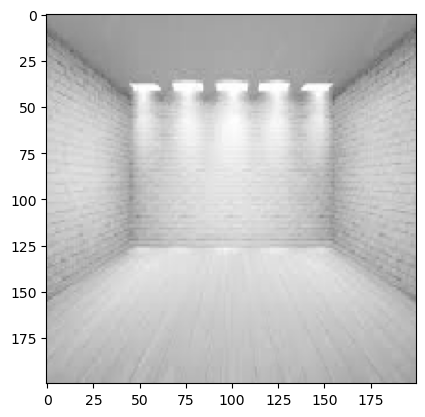

1/1 [==============================] - 0s 44ms/step
Crackfree Walls


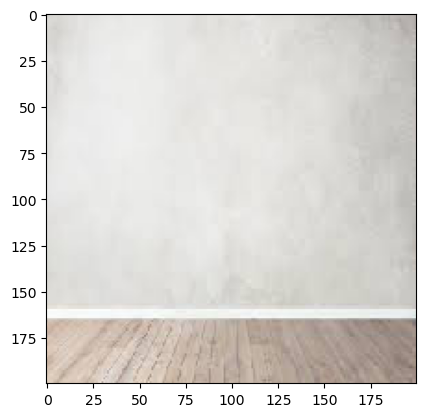

1/1 [==============================] - 0s 42ms/step
Crackfree Walls


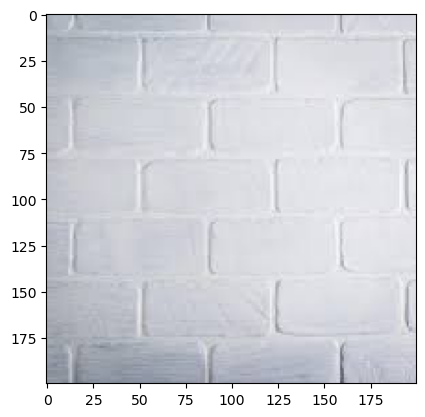

1/1 [==============================] - 0s 49ms/step
Crackfree Walls


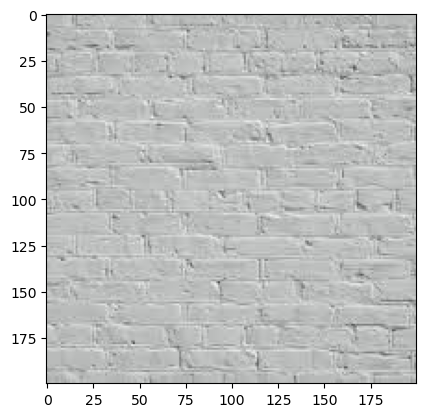

1/1 [==============================] - 0s 50ms/step
Crackfree Walls


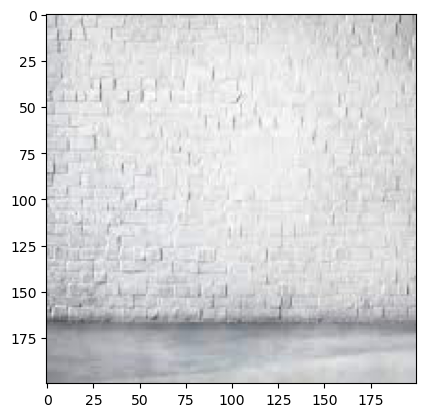

1/1 [==============================] - 0s 55ms/step
Crackfree Walls


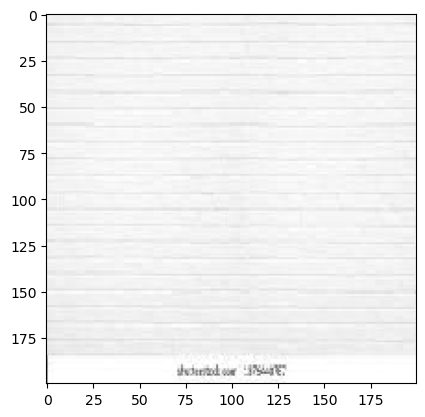

1/1 [==============================] - 0s 54ms/step
Crackfree Walls


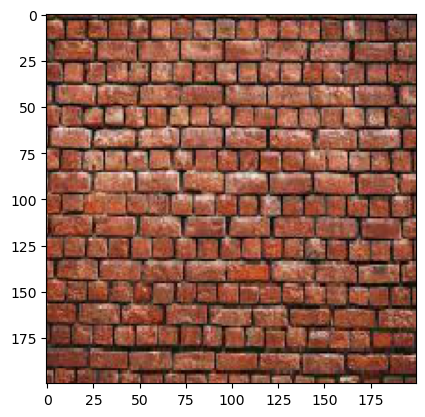

1/1 [==============================] - 0s 49ms/step
Crackfree Walls


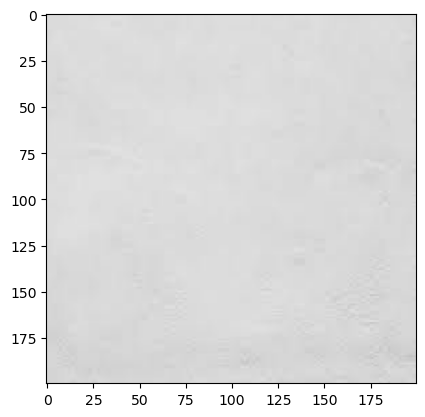

1/1 [==============================] - 0s 46ms/step
Crackfree Walls


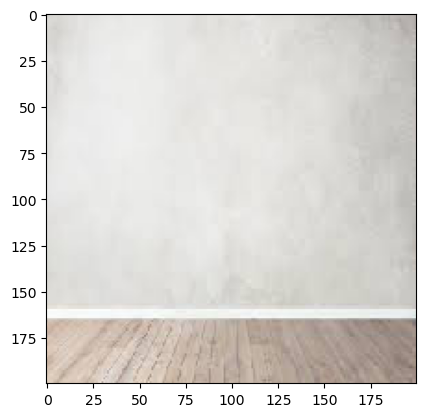

1/1 [==============================] - 0s 42ms/step
Crackfree Walls


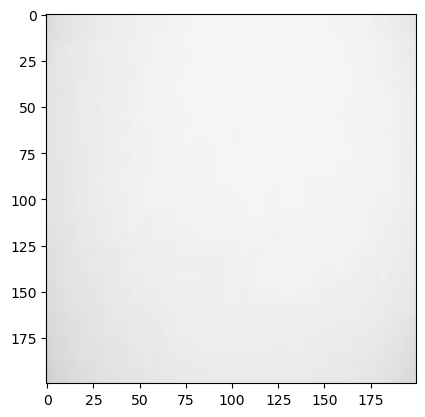

1/1 [==============================] - 0s 43ms/step
Crackfree Walls


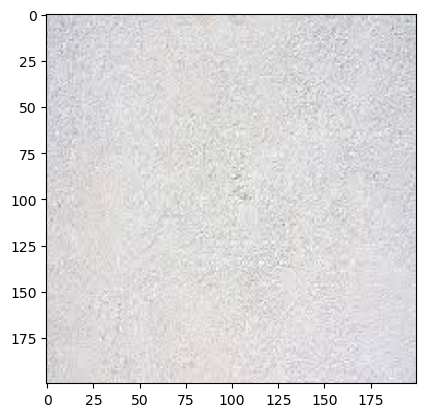

1/1 [==============================] - 0s 52ms/step
Crackfree Walls


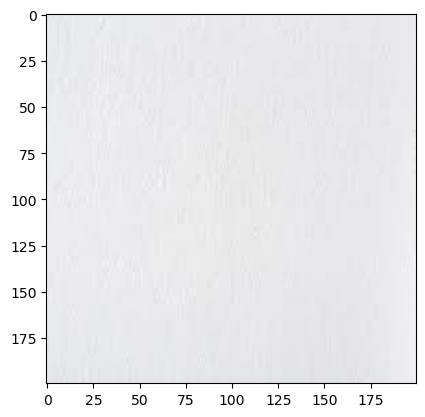

1/1 [==============================] - 0s 52ms/step
Crackfree Walls


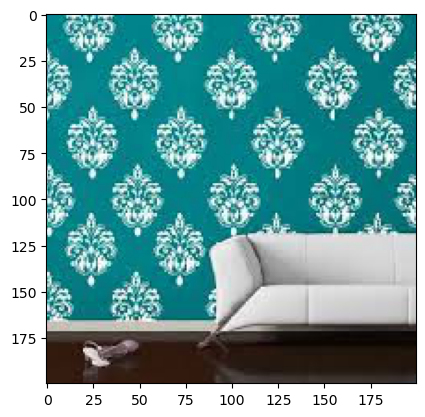

1/1 [==============================] - 0s 42ms/step
Crackfree Walls


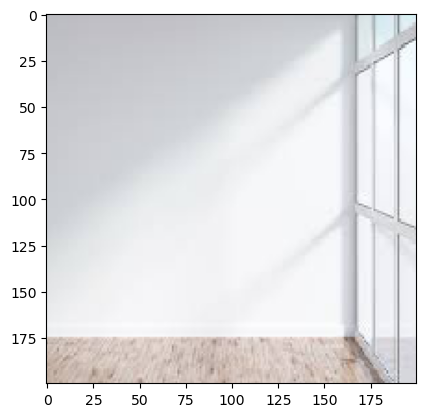

1/1 [==============================] - 0s 46ms/step
Crackfree Walls


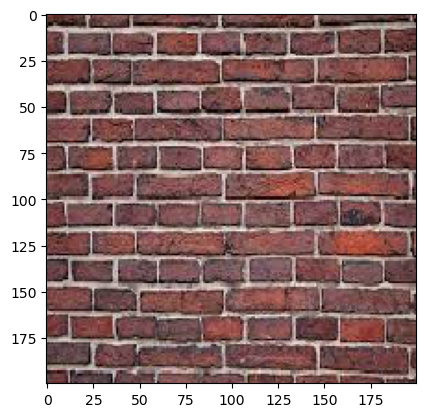

1/1 [==============================] - 0s 59ms/step
Crackfree Walls


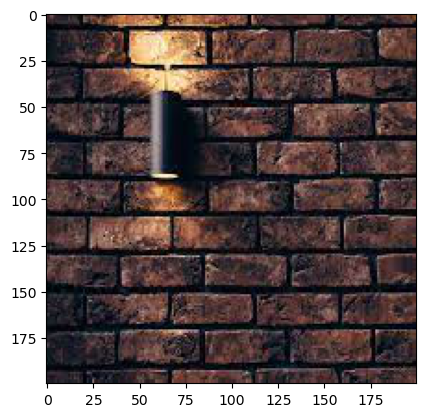

1/1 [==============================] - 0s 52ms/step
Crackfree Walls


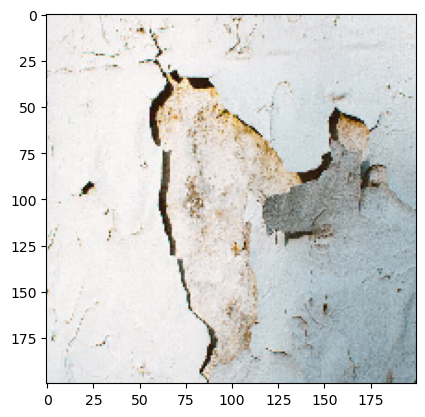

1/1 [==============================] - 0s 53ms/step
Cracked Walls


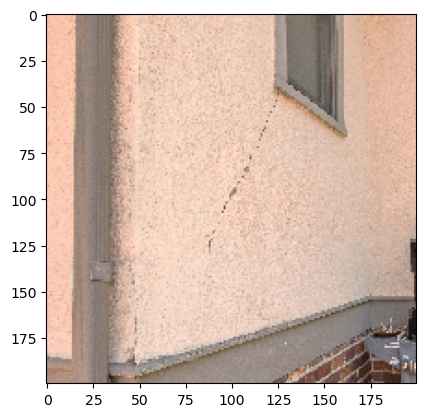

1/1 [==============================] - 0s 60ms/step
Crackfree Walls


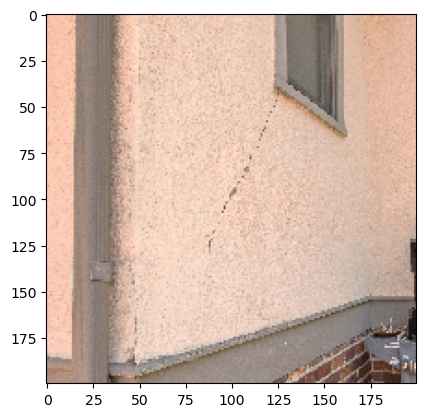

1/1 [==============================] - 0s 51ms/step
Crackfree Walls


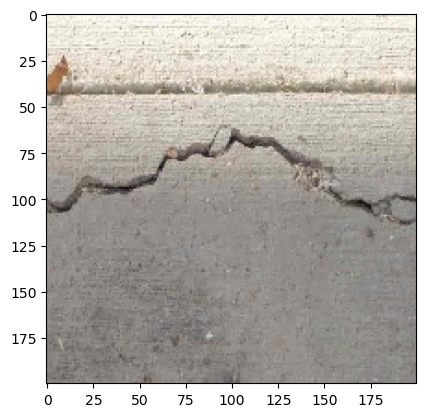

1/1 [==============================] - 0s 49ms/step
Cracked Walls


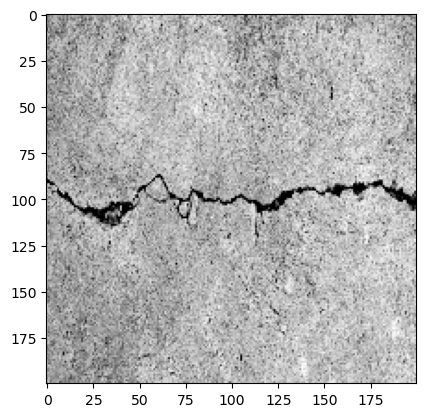

1/1 [==============================] - 0s 49ms/step
Cracked Walls


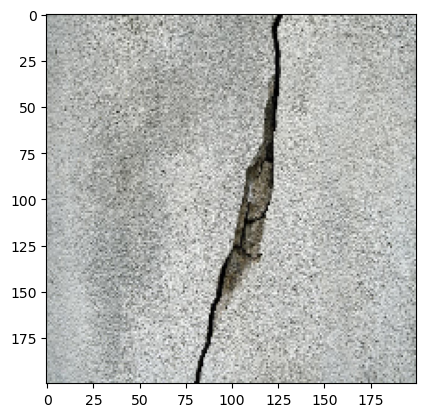

1/1 [==============================] - 0s 40ms/step
Cracked Walls


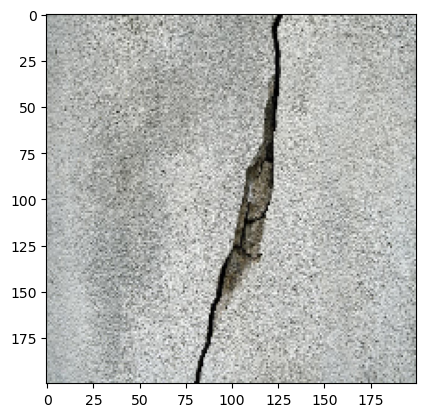

1/1 [==============================] - 0s 54ms/step
Cracked Walls


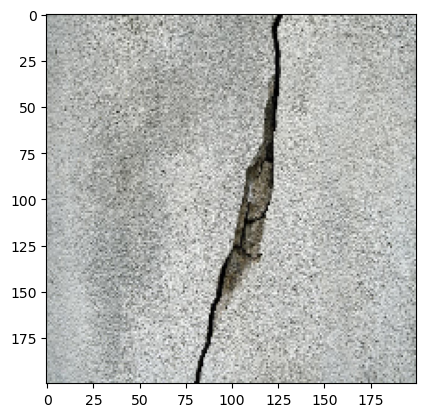

1/1 [==============================] - 0s 43ms/step
Cracked Walls


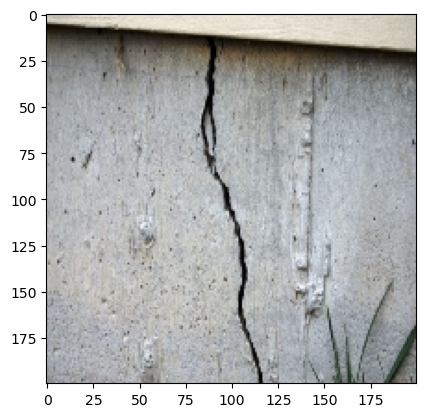

1/1 [==============================] - 0s 44ms/step
Crackfree Walls


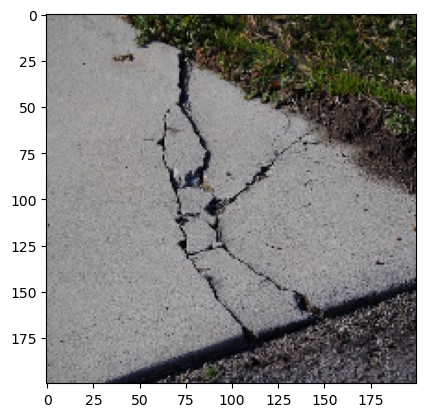

1/1 [==============================] - 0s 53ms/step
Crackfree Walls


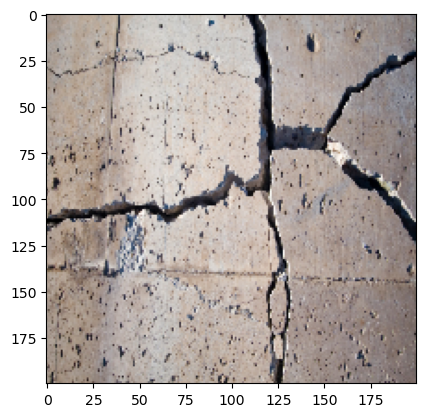

1/1 [==============================] - 0s 47ms/step
Cracked Walls


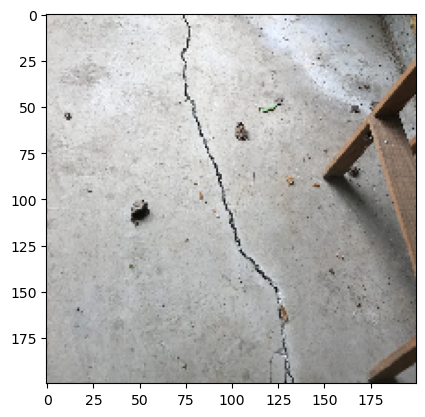

1/1 [==============================] - 0s 47ms/step
Cracked Walls


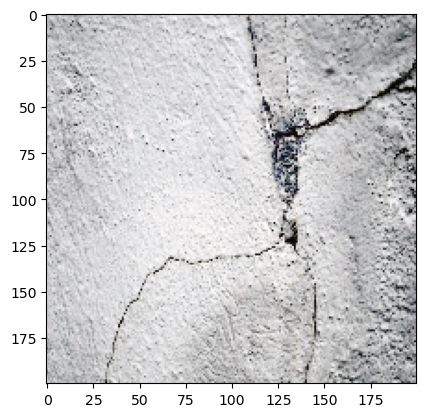

1/1 [==============================] - 0s 53ms/step
Cracked Walls


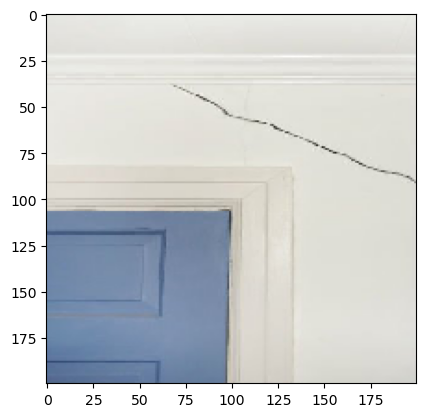

1/1 [==============================] - 0s 51ms/step
Crackfree Walls


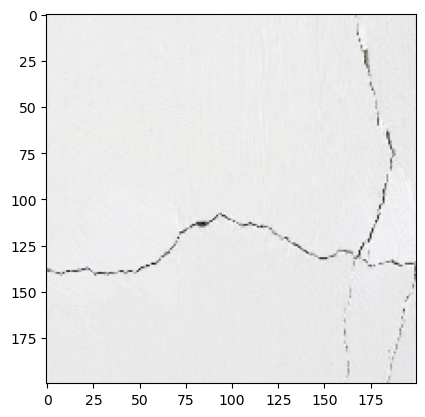

1/1 [==============================] - 0s 60ms/step
Crackfree Walls


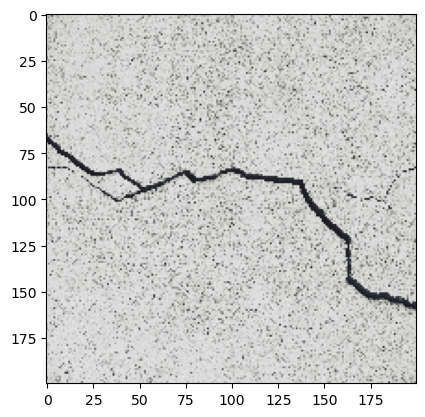

1/1 [==============================] - 0s 51ms/step
Cracked Walls


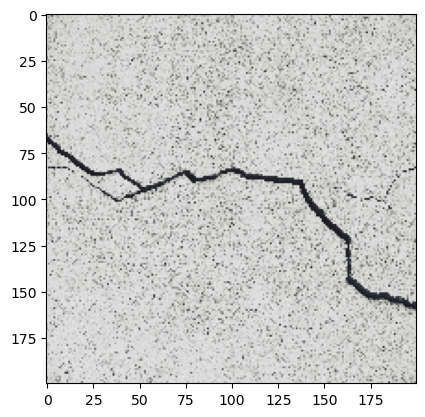

1/1 [==============================] - 0s 53ms/step
Cracked Walls


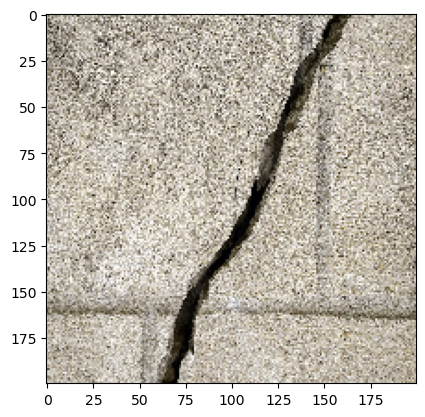

1/1 [==============================] - 0s 52ms/step
Cracked Walls


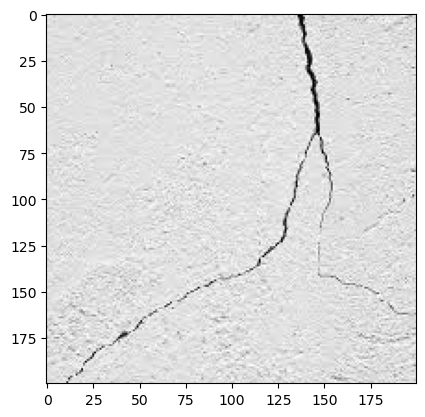

1/1 [==============================] - 0s 46ms/step
Crackfree Walls


In [23]:
for dir_path,dir_name,file_name in walk('D:\\Computer_Vision\\base_data\\testing'):
    for fn in file_name:
        if fn[-3:]=='jpg' or fn[-3:]=='png':
            image_filename=path.join(dir_path,fn)
            img=image.load_img(image_filename,target_size=(200,200))
            plt.imshow(img)
            plt.show()
            X=image.img_to_array(img)
            X=np.expand_dims(X,axis=0)
            images=np.vstack([X])
            val=model.predict(images)
            if val==0:
                print('Crackfree Walls')
            else:
                print('Cracked Walls')
             